In [29]:
from waterlevels_oker.data import preprocess_weather_data
from waterlevels_oker import utils
import pandas as pd
import seaborn as sns
import requests

%config InlineBackend.figure_format = "retina"

In [3]:
weather_data = preprocess_weather_data()
daily_weather_data = weather_data.groupby(weather_data.index.date).mean()
daily_weather_data

,precipitation,pressure_msl,sunshine,temperature,wind_direction,wind_speed,cloud_cover,dew_point,relative_humidity,visibility,wind_gust_direction,wind_gust_speed,solar
2010-01-01,0.026087,999.539130,0.000000,-2.000000,95.217391,12.578261,97.260870,-3.826087,87.304348,16134.782609,109.130435,19.626087,0.018478
2010-01-02,0.147826,1013.982609,0.000000,-3.573913,263.043478,10.639130,94.913043,-4.700000,91.956522,3752.173913,266.086957,16.400000,0.021652
2010-01-03,0.095455,1019.768182,0.000000,-4.604545,49.545455,10.009091,98.818182,-5.781818,91.318182,5863.636364,61.818182,15.518182,0.021000
2010-01-04,0.000000,1016.766667,10.416667,-5.462500,240.000000,10.662500,82.291667,-7.687500,84.375000,11916.666667,233.750000,18.654167,0.039542
2010-01-05,0.000000,1008.087500,6.500000,-5.525000,192.083333,11.062500,60.875000,-8.137500,82.166667,13375.000000,190.833333,19.058333,0.037125
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-07-27,0.708333,1014.000000,1.166667,18.870833,94.166667,7.262500,97.833333,16.483333,86.416667,30292.916667,99.583333,13.937500,0.127000
2024-07-28,0.450000,1022.033333,25.291667,18.145833,296.666667,12.058333,55.541667,13.579167,76.208333,49793.333333,287.083333,22.458333,0.250208
2024-07-29,0.000000,1024.644583,37.208333,17.912500,165.833333,5.583333,3.625000,10.412500,65.291667,60822.083333,150.000000,11.683333,0.314542
2024-07-30,0.000000,1017.733333,36.666667,21.650000,195.416667,6.158333,24.916667,12.712500,59.583333,61507.083333,185.000000,13.350000,0.304875


In [8]:
okertal_data = pd.read_excel(utils.get_raw_path("Oker Daten.xlsx"), index_col=0)
okertal_data

,Stauinhalt Okertalsperre [Mio.m³],UW-Abgabe Okertalsperre [m³/s],Zufluss Okertalsperre [m³/s]
Datum,,,
2012-10-01,13.448,1.337,0.493
2012-10-02,13.323,1.282,0.505
2012-10-03,13.215,1.286,0.491
2012-10-04,13.165,1.322,3.758
2012-10-05,13.253,1.307,2.735
...,...,...,...
2024-07-27,29.868,1.307,3.405
2024-07-28,29.968,1.309,4.778
2024-07-29,30.017,1.306,2.957


In [9]:
okertal_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4322 entries, 2012-10-01 to 2024-07-31
Data columns (total 3 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Stauinhalt Okertalsperre [Mio.m³]  4322 non-null   float64
 1   UW-Abgabe Okertalsperre [m³/s]     4322 non-null   float64
 2   Zufluss Okertalsperre [m³/s]       4322 non-null   float64
dtypes: float64(3)
memory usage: 135.1 KB


In [10]:
data_full = daily_weather_data.join(okertal_data, how="inner")
data_full

,precipitation,pressure_msl,sunshine,temperature,wind_direction,wind_speed,cloud_cover,dew_point,relative_humidity,visibility,wind_gust_direction,wind_gust_speed,solar,Stauinhalt Okertalsperre [Mio.m³],UW-Abgabe Okertalsperre [m³/s],Zufluss Okertalsperre [m³/s]
2012-10-01,0.000000,1017.037500,25.750000,11.750000,217.083333,9.279167,9.250000,6.129167,70.208333,38750.000000,214.583333,17.337500,0.159417,13.448,1.337,0.493
2012-10-02,0.004167,1015.362500,12.750000,14.633333,233.333333,11.841667,82.583333,8.887500,68.875000,36875.000000,238.750000,22.304167,0.126250,13.323,1.282,0.505
2012-10-03,0.141667,1011.250000,9.083333,15.037500,230.416667,14.866667,81.000000,10.016667,72.791667,45500.000000,229.583333,30.037500,0.095958,13.215,1.286,0.491
2012-10-04,0.668182,1008.190909,1.136364,11.009091,250.454545,13.963636,83.318182,9.890909,92.772727,23922.727273,256.363636,27.195455,0.024636,13.165,1.322,3.758
2012-10-05,0.233333,1009.237500,0.041667,11.712500,237.916667,18.566667,86.166667,9.325000,85.416667,40625.000000,242.083333,36.983333,0.030958,13.253,1.307,2.735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-07-27,0.708333,1014.000000,1.166667,18.870833,94.166667,7.262500,97.833333,16.483333,86.416667,30292.916667,99.583333,13.937500,0.127000,29.868,1.307,3.405
2024-07-28,0.450000,1022.033333,25.291667,18.145833,296.666667,12.058333,55.541667,13.579167,76.208333,49793.333333,287.083333,22.458333,0.250208,29.968,1.309,4.778
2024-07-29,0.000000,1024.644583,37.208333,17.912500,165.833333,5.583333,3.625000,10.412500,65.291667,60822.083333,150.000000,11.683333,0.314542,30.017,1.306,2.957
2024-07-30,0.000000,1017.733333,36.666667,21.650000,195.416667,6.158333,24.916667,12.712500,59.583333,61507.083333,185.000000,13.350000,0.304875,30.025,1.308,2.429


<Axes: >

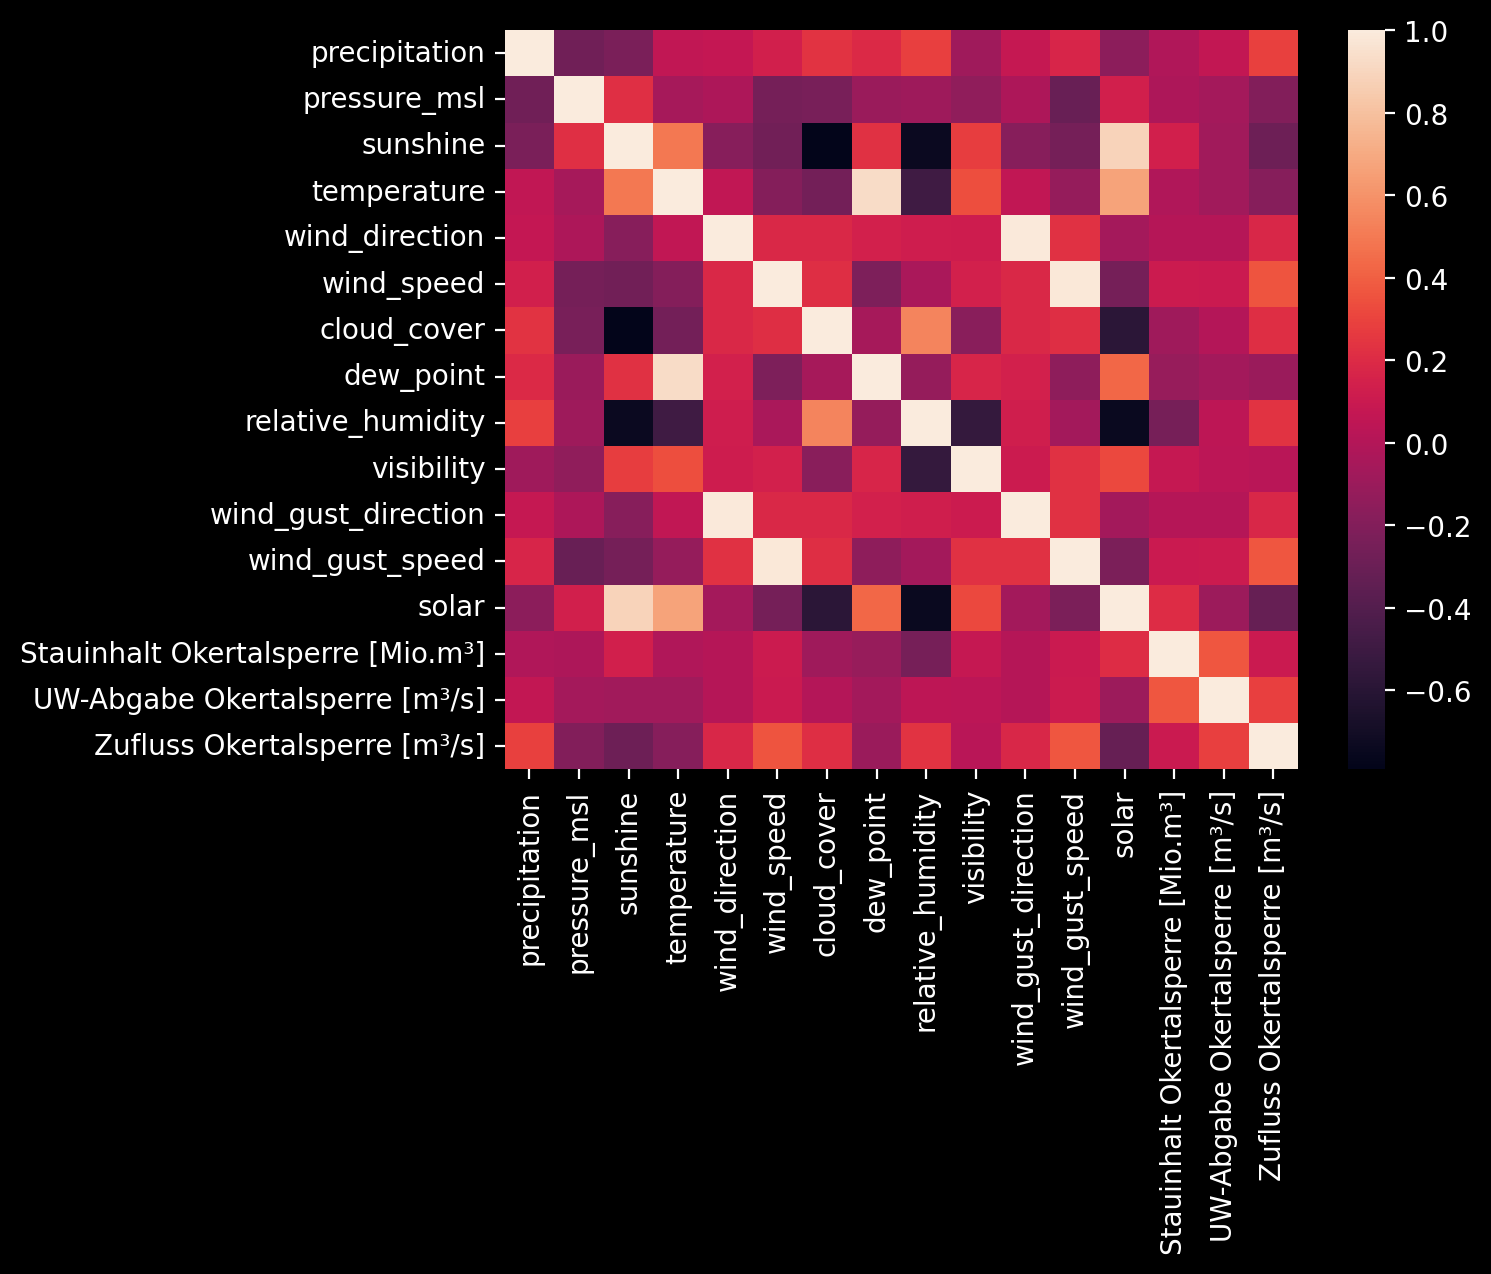

In [12]:
sns.heatmap(data_full.corr())

In [13]:
okertal_data.columns

Index(['Stauinhalt Okertalsperre [Mio.m³]', 'UW-Abgabe Okertalsperre [m³/s]',
       'Zufluss Okertalsperre [m³/s]'],
      dtype='object')

# Water fill

In [27]:
feature = "Stauinhalt Okertalsperre [Mio.m³]"
okertal_corr = data_full.corr()[[feature]]
okertal_corr = okertal_corr.loc[okertal_corr.index != feature]
okertal_corr = okertal_corr.rename(columns={(feature): "correlation"})
okertal_corr.loc[:, "absolute_correlation"] = abs(okertal_corr["correlation"])
okertal_corr.sort_values(by="absolute_correlation", ascending=False)

,correlation,absolute_correlation
UW-Abgabe Okertalsperre [m³/s],0.369840,0.369840
relative_humidity,-0.248018,0.248018
solar,0.208295,0.208295
sunshine,0.135348,0.135348
dew_point,-0.116245,0.116245
wind_speed,0.108949,0.108949
wind_gust_speed,0.101728,0.101728
Zufluss Okertalsperre [m³/s],0.100252,0.100252
cloud_cover,-0.081780,0.081780
visibility,0.079147,0.079147


# Water going out

In [26]:
feature = "UW-Abgabe Okertalsperre [m³/s]"
okertal_corr = data_full.corr()[[feature]]
okertal_corr = okertal_corr.loc[okertal_corr.index != feature]
okertal_corr = okertal_corr.rename(columns={(feature): "correlation"})
okertal_corr.loc[:, "absolute_correlation"] = abs(okertal_corr["correlation"])
okertal_corr.sort_values(by="absolute_correlation", ascending=False)

,correlation,absolute_correlation
Stauinhalt Okertalsperre [Mio.m³],0.369840,0.369840
Zufluss Okertalsperre [m³/s],0.281231,0.281231
wind_gust_speed,0.106651,0.106651
wind_speed,0.103993,0.103993
solar,-0.097851,0.097851
sunshine,-0.076149,0.076149
temperature,-0.075154,0.075154
precipitation,0.065727,0.065727
dew_point,-0.064437,0.064437
pressure_msl,-0.060968,0.060968


# Water going in

In [18]:
okertal_corr = data_full.loc[
	:, weather_data.columns.to_list() + ["Zufluss Okertalsperre [m³/s]"]
].corr()[["Zufluss Okertalsperre [m³/s]"]]
okertal_corr = okertal_corr.iloc[:-1]
okertal_corr = okertal_corr.rename(
	columns={"Zufluss Okertalsperre [m³/s]": "correlation"}
)
okertal_corr.loc[:, "absolute_correlation"] = abs(okertal_corr["correlation"])
okertal_corr.sort_values(by="absolute_correlation", ascending=False)

,correlation,absolute_correlation
wind_gust_speed,0.369265,0.369265
wind_speed,0.362212,0.362212
solar,-0.321482,0.321482
sunshine,-0.289341,0.289341
precipitation,0.287000,0.287000
relative_humidity,0.236806,0.236806
cloud_cover,0.216143,0.216143
pressure_msl,-0.198133,0.198133
temperature,-0.187598,0.187598
wind_direction,0.176770,0.176770


In [41]:
full_weather = pd.DataFrame()
for year in range(2012, 2024):
	params = {
		"date": f"{year}-10-01",
		"last_date": f"{year + 1}-07-31",
		"lat": 51.85,
		"lon": 10.45,
	}

	url = "https://api.brightsky.dev/weather"
	response = requests.get(url, params=params)
	climate_data = pd.DataFrame(response.json()["weather"])
	full_weather = pd.concat([full_weather, climate_data])
full_weather


,timestamp,source_id,precipitation,pressure_msl,sunshine,temperature,wind_direction,wind_speed,cloud_cover,dew_point,relative_humidity,visibility,wind_gust_direction,wind_gust_speed,condition,precipitation_probability,precipitation_probability_6h,solar,fallback_source_ids,icon
0,2012-10-01T00:00:00+00:00,264664,0.0,NaN,NaN,9.7,NaN,NaN,NaN,3.3,64.0,NaN,NaN,NaN,dry,None,None,NaN,{},clear-night
1,2012-10-01T01:00:00+00:00,264664,0.0,NaN,NaN,7.5,NaN,NaN,NaN,3.2,74.0,NaN,NaN,NaN,dry,None,None,NaN,{},clear-night
2,2012-10-01T02:00:00+00:00,264664,0.0,NaN,NaN,10.1,NaN,NaN,NaN,4.5,68.0,NaN,NaN,NaN,dry,None,None,NaN,{},clear-night
3,2012-10-01T03:00:00+00:00,264664,0.0,1020.3,0.0,8.2,280.0,4.0,87.0,4.8,79.0,14000.0,300.0,8.3,dry,None,None,0.000,"{'solar': 6903, 'pressure_msl': 6903, 'wind_gu...",cloudy
4,2012-10-01T04:00:00+00:00,264664,0.0,1019.9,0.0,10.1,290.0,5.8,62.0,6.9,80.0,13000.0,290.0,9.0,dry,None,None,0.000,"{'solar': 6903, 'pressure_msl': 6903, 'wind_gu...",partly-cloudy-night
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7292,2024-07-30T20:00:00+00:00,264664,0.0,1015.9,0.0,19.2,230.0,1.8,25.0,15.5,79.0,43700.0,250.0,5.0,dry,None,None,0.001,"{'solar': 96596, 'pressure_msl': 96596, 'wind_...",partly-cloudy-night
7293,2024-07-30T21:00:00+00:00,264664,0.0,1015.9,0.0,18.6,230.0,2.2,0.0,15.2,81.0,52820.0,230.0,5.0,dry,None,None,0.000,"{'solar': 96596, 'pressure_msl': 96596, 'wind_...",clear-night
7294,2024-07-30T22:00:00+00:00,264664,0.0,1015.7,0.0,19.9,220.0,1.4,0.0,14.4,71.0,52890.0,200.0,4.0,dry,None,None,0.000,"{'solar': 96596, 'pressure_msl': 96596, 'wind_...",clear-night
7295,2024-07-30T23:00:00+00:00,264664,0.0,1015.8,0.0,17.7,0.0,1.1,0.0,14.3,81.0,52280.0,130.0,3.2,dry,None,None,0.000,"{'solar': 96596, 'pressure_msl': 96596, 'wind_...",clear-night


In [44]:
full_weather = full_weather.assign(
	timestamp=lambda _df: pd.to_datetime(_df["timestamp"])
).set_index("timestamp")


In [45]:
# Drop timezone from datetime index
full_weather.index = full_weather.index.tz_localize(None)

drop_cols = [
	"source_id",
	"condition",
	"precipitation_probability",
	"precipitation_probability_6h",
	"fallback_source_ids",
	"icon",
]
full_weather = full_weather.drop(columns=drop_cols)
# Impute missing sunshine values during nighttime with 0
night_missing_sunshine = full_weather.loc[
	full_weather["sunshine"].isna()
	& full_weather.index.hour.isin([21, 22, 23, 0, 1, 2])
].index
full_weather.loc[night_missing_sunshine, "sunshine"] = 0

full_weather = full_weather.dropna(axis=0)
full_weather

,precipitation,pressure_msl,sunshine,temperature,wind_direction,wind_speed,cloud_cover,dew_point,relative_humidity,visibility,wind_gust_direction,wind_gust_speed,solar
timestamp,,,,,,,,,,,,,
2012-10-01 03:00:00,0.0,1020.3,0.0,8.2,280.0,4.0,87.0,4.8,79.0,14000.0,300.0,8.3,0.000
2012-10-01 04:00:00,0.0,1019.9,0.0,10.1,290.0,5.8,62.0,6.9,80.0,13000.0,290.0,9.0,0.000
2012-10-01 05:00:00,0.0,1019.4,0.0,9.7,290.0,4.7,12.0,6.0,78.0,9000.0,300.0,8.6,0.000
2012-10-01 06:00:00,0.0,1019.4,0.0,10.9,290.0,4.0,0.0,6.2,73.0,10000.0,270.0,7.2,0.003
2012-10-01 07:00:00,0.0,1019.1,35.0,9.8,260.0,4.3,0.0,6.2,78.0,12000.0,240.0,8.3,0.062
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-07-30 20:00:00,0.0,1015.9,0.0,19.2,230.0,1.8,25.0,15.5,79.0,43700.0,250.0,5.0,0.001
2024-07-30 21:00:00,0.0,1015.9,0.0,18.6,230.0,2.2,0.0,15.2,81.0,52820.0,230.0,5.0,0.000
2024-07-30 22:00:00,0.0,1015.7,0.0,19.9,220.0,1.4,0.0,14.4,71.0,52890.0,200.0,4.0,0.000


In [46]:
daily_weather_data = full_weather.groupby(full_weather.index.date).mean()
data_full = daily_weather_data.join(okertal_data, how="inner")


In [47]:
data_full

,precipitation,pressure_msl,sunshine,temperature,wind_direction,wind_speed,cloud_cover,dew_point,relative_humidity,visibility,wind_gust_direction,wind_gust_speed,solar,Stauinhalt Okertalsperre [Mio.m³],UW-Abgabe Okertalsperre [m³/s],Zufluss Okertalsperre [m³/s]
2012-10-01,0.0000,1017.638889,32.166667,14.177778,246.111111,7.450000,18.555556,5.872222,58.944444,22722.222222,238.888889,14.588889,0.205667,13.448,1.337,0.493
2012-10-02,0.0000,1016.305882,23.000000,15.682353,225.882353,10.100000,79.941176,8.341176,61.705882,26235.294118,223.529412,19.752941,0.191471,13.323,1.282,0.505
2012-10-03,0.0000,1012.621429,2.785714,15.207143,204.285714,17.357143,95.428571,9.250000,67.642857,30857.142857,195.714286,34.164286,0.055429,13.215,1.286,0.491
2012-10-04,0.0000,1011.800000,0.000000,9.950000,255.000000,14.250000,93.500000,6.100000,77.000000,16000.000000,265.000000,38.900000,0.002500,13.165,1.322,3.758
2012-10-05,0.1375,1010.487500,0.125000,11.900000,232.500000,24.337500,91.875000,8.075000,77.375000,14501.250000,227.500000,42.500000,0.027250,13.253,1.307,2.735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-07-27,1.2250,1014.270833,1.166667,19.212500,161.250000,13.833333,93.500000,17.041667,87.791667,13383.750000,165.833333,21.237500,0.132042,29.868,1.307,3.405
2024-07-28,0.1125,1022.299167,19.500000,17.933333,275.000000,13.479167,53.416667,13.575000,77.708333,39649.583333,282.083333,25.779167,0.249583,29.968,1.309,4.778
2024-07-29,0.0000,1024.551667,34.833333,17.766667,137.083333,3.212500,3.083333,10.491667,66.083333,52706.666667,135.416667,8.187500,0.309667,30.017,1.306,2.957
2024-07-30,0.0000,1017.787500,34.166667,21.587500,173.333333,6.700000,18.625000,12.462500,59.166667,62237.916667,186.250000,13.179167,0.290458,30.025,1.308,2.429


# Fill

In [48]:
feature = "Stauinhalt Okertalsperre [Mio.m³]"
okertal_corr = data_full.corr()[[feature]]
okertal_corr = okertal_corr.loc[okertal_corr.index != feature]
okertal_corr = okertal_corr.rename(columns={(feature): "correlation"})
okertal_corr.loc[:, "absolute_correlation"] = abs(okertal_corr["correlation"])
okertal_corr.sort_values(by="absolute_correlation", ascending=False)

,correlation,absolute_correlation
UW-Abgabe Okertalsperre [m³/s],0.511400,0.511400
solar,0.253473,0.253473
relative_humidity,-0.248510,0.248510
sunshine,0.171298,0.171298
cloud_cover,-0.094452,0.094452
visibility,0.092613,0.092613
pressure_msl,-0.069299,0.069299
temperature,0.068858,0.068858
wind_gust_direction,-0.066068,0.066068
wind_direction,-0.065673,0.065673


# Out

In [49]:
feature = "UW-Abgabe Okertalsperre [m³/s]"
okertal_corr = data_full.corr()[[feature]]
okertal_corr = okertal_corr.loc[okertal_corr.index != feature]
okertal_corr = okertal_corr.rename(columns={(feature): "correlation"})
okertal_corr.loc[:, "absolute_correlation"] = abs(okertal_corr["correlation"])
okertal_corr.sort_values(by="absolute_correlation", ascending=False)

,correlation,absolute_correlation
Stauinhalt Okertalsperre [Mio.m³],0.511400,0.511400
Zufluss Okertalsperre [m³/s],0.115900,0.115900
pressure_msl,-0.067036,0.067036
wind_gust_speed,0.050137,0.050137
relative_humidity,-0.047850,0.047850
cloud_cover,0.044175,0.044175
wind_speed,0.040758,0.040758
visibility,-0.040224,0.040224
sunshine,-0.037019,0.037019
dew_point,-0.035989,0.035989


# In

In [50]:
okertal_corr = data_full.loc[
	:, weather_data.columns.to_list() + ["Zufluss Okertalsperre [m³/s]"]
].corr()[["Zufluss Okertalsperre [m³/s]"]]
okertal_corr = okertal_corr.iloc[:-1]
okertal_corr = okertal_corr.rename(
	columns={"Zufluss Okertalsperre [m³/s]": "correlation"}
)
okertal_corr.loc[:, "absolute_correlation"] = abs(okertal_corr["correlation"])
okertal_corr.sort_values(by="absolute_correlation", ascending=False)

,correlation,absolute_correlation
wind_gust_speed,0.405973,0.405973
wind_speed,0.384164,0.384164
solar,-0.300997,0.300997
sunshine,-0.273696,0.273696
cloud_cover,0.220337,0.220337
wind_gust_direction,0.204935,0.204935
precipitation,0.200432,0.200432
wind_direction,0.198247,0.198247
pressure_msl,-0.177736,0.177736
relative_humidity,0.140980,0.140980


In [54]:
data_full.rename(
	columns={
		"Zufluss Okertalsperre [m³/s]": "in",
		"UW-Abgabe Okertalsperre [m³/s]": "out",
		"Stauinhalt Okertalsperre [Mio.m³]": "fill",
	}
).loc[
	:,
	[
		"in",
		"out",
		"fill",
	],
].corr()

,in,out,fill
in,1.000000,0.1159,-0.011672
out,0.115900,1.0000,0.511400
fill,-0.011672,0.5114,1.000000
